### Data Dictionary

In this problem, we'll see how clustering can be used to find similar groups of customers who belong to an airline's frequent flyer program. The airline is trying to learn more about its customers so that it can target different customer segments with different types of mileage offers. 

There are seven different variables in the dataset, described below:

    Balance = number of miles eligible for award travel
    QualMiles = number of miles qualifying for TopFlight status
    BonusMiles = number of miles earned from non-flight bonus transactions in the past 12 months
    BonusTrans = number of non-flight bonus transactions in the past 12 months
    FlightMiles = number of flight miles in the past 12 months
    FlightTrans = number of flight transactions in the past 12 months
    DaysSinceEnroll = number of days since enrolled in the frequent flyer program


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.25)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv("AirlinesCluster.csv")

In [3]:
df

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


In [4]:
scalar = StandardScaler()

In [5]:
df_scaled = scalar.fit_transform(df)

In [6]:
df_scaled

array([[-4.51140783e-01, -1.86298687e-01, -7.02786266e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.01088399e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -5.39252702e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  3.43803696e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -6.89286154e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.09991847e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [7]:
X = df_scaled

### Use Dendogram

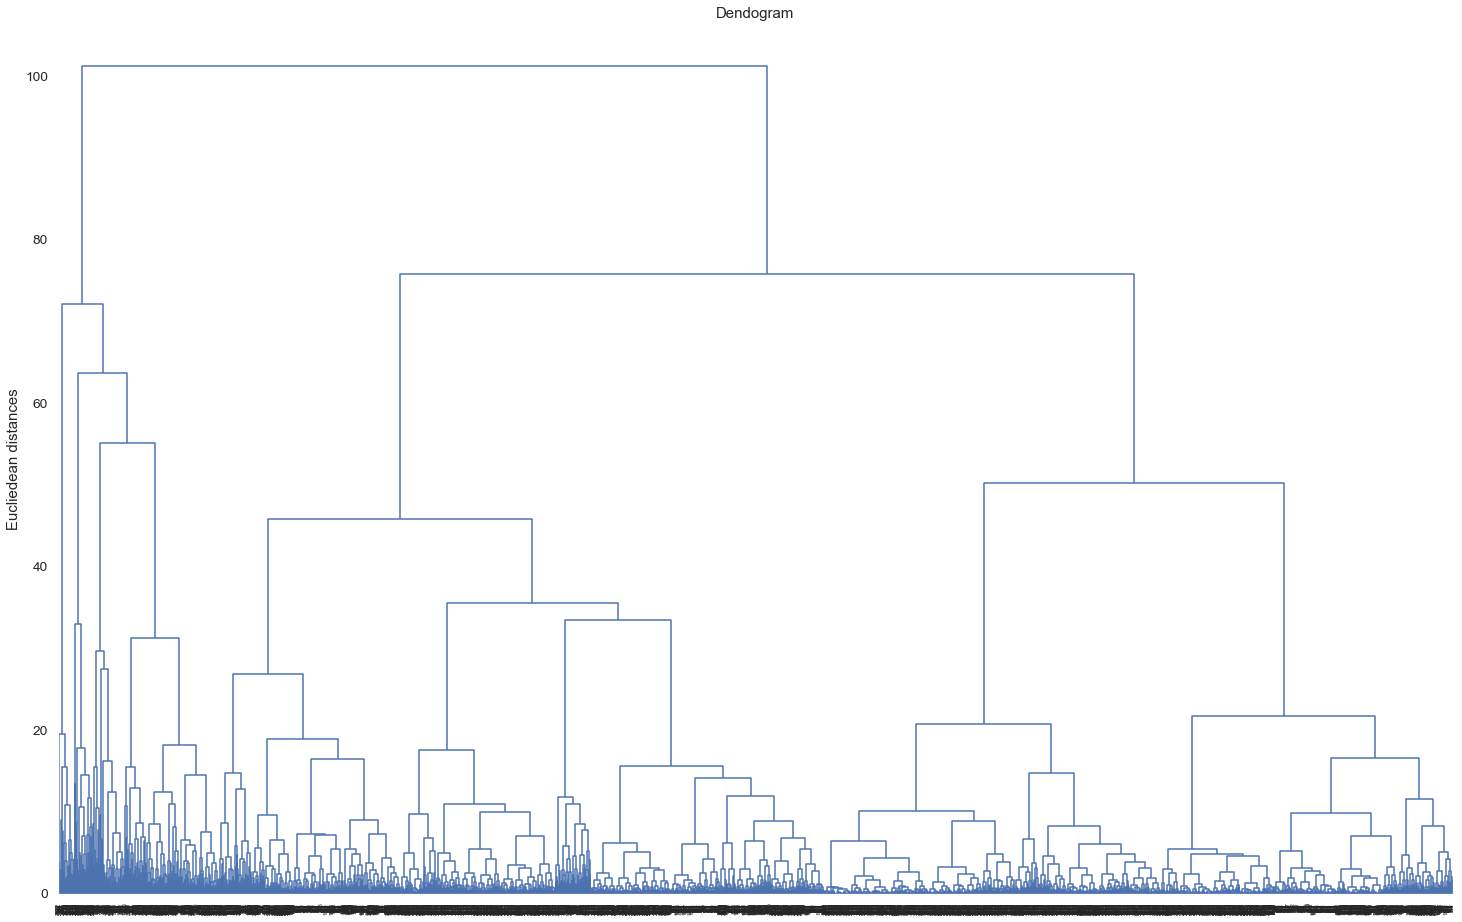

In [8]:
plt.figure(figsize=(25,16))
dendogram = sch.dendrogram(sch.linkage(X,method='ward'),truncate_mode='level',color_threshold=0)
plt.title("Dendogram")
plt.xlabel("")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [9]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [10]:
y_hc = hc.fit_predict(X)

In [11]:
y_hc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [12]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [13]:
y

,Cluster
0,1
1,1
2,1
3,1
4,0
...,...
3994,1
3995,1
3996,1
3997,1


In [14]:
y['Cluster'].unique()

array([1, 0, 2, 4, 3], dtype=int64)

In [15]:
y['Cluster'].sort_values()

3480    0
2691    0
2193    0
723     0
1084    0
       ..
2999    4
135     4
2751    4
1620    4
3788    4
Name: Cluster, Length: 3999, dtype: int64

In [16]:
y['Cluster'].value_counts()

1    1801
2    1737
0     360
4      53
3      48
Name: Cluster, dtype: int64

In [17]:
y.shape

(3999, 1)

In [18]:
newdf = pd.concat([df,y],axis=1)

In [19]:
newdf

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,Cluster
0,28143,0,174,1,0,0,7000,1
1,19244,0,215,2,0,0,6968,1
2,41354,0,4123,4,0,0,7034,1
3,14776,0,500,1,0,0,6952,1
4,97752,0,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403,1
3995,64385,0,981,5,0,0,1395,1
3996,73597,0,25447,8,0,0,1402,1
3997,54899,0,500,1,500,1,1401,1


In [20]:
meandf = newdf.groupby(by='Cluster').mean()

In [21]:
meandf

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
Cluster,,,,,,,
0,204316.227778,144.711111,36265.022222,19.802778,2286.719444,6.744444,4744.158333
1,37353.074403,0.882288,3651.923931,4.246530,137.491394,0.451416,3402.970572
2,79910.013241,123.694876,26735.156592,16.832470,148.672424,0.483592,4727.468048
3,135318.020833,5870.062500,16406.000000,12.645833,974.770833,3.270833,4320.375000
4,154830.603774,490.716981,32137.018868,33.471698,8752.622642,23.679245,4046.830189


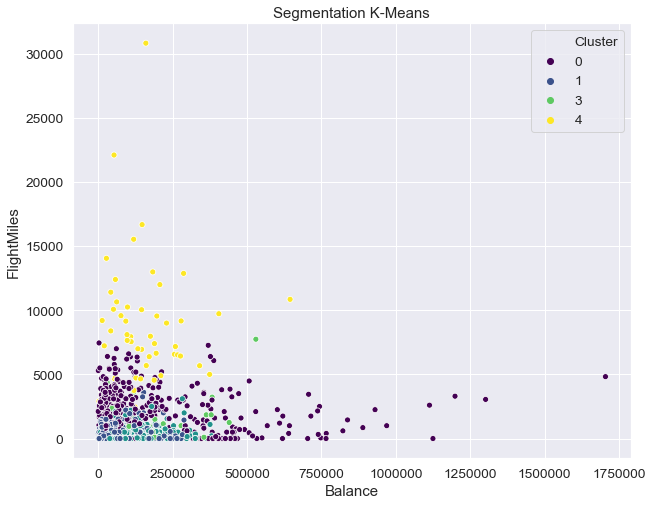

In [22]:
x_axis = newdf['Balance']
y_axis = newdf['FlightMiles']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=newdf['Cluster'],palette='viridis')
plt.title('Segmentation K-Means')
plt.show()

### K-Means Clustering

In [23]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=88, max_iter=1000)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

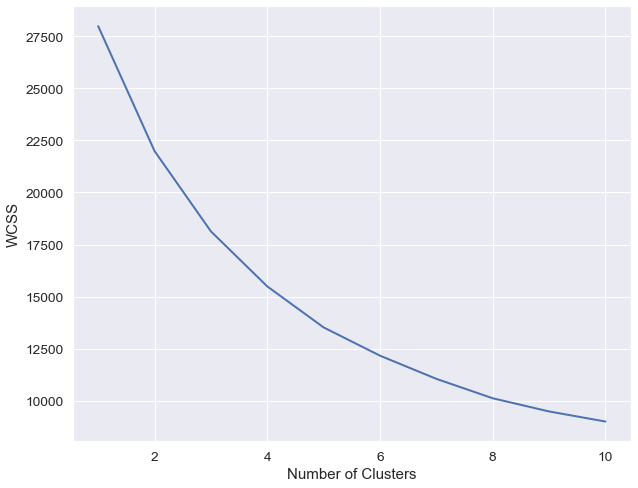

In [24]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [25]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=88,max_iter=1000)

In [26]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=88, tol=0.0001, verbose=0)

### Results

In [27]:
df_segm_kmeans = df.copy()

In [28]:
df_segm_kmeans

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


In [29]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [30]:
df_segm_kmeans

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,Segment K-Means
0,28143,0,174,1,0,0,7000,1
1,19244,0,215,2,0,0,6968,1
2,41354,0,4123,4,0,0,7034,1
3,14776,0,500,1,0,0,6952,1
4,97752,0,43300,26,2077,4,6935,3
...,...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403,4
3995,64385,0,981,5,0,0,1395,4
3996,73597,0,25447,8,0,0,1402,4
3997,54899,0,500,1,500,1,1401,4


In [31]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [32]:
df_segm_analysis

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
Segment K-Means,,,,,,,
0,117326.186441,5445.305085,19059.610169,12.305085,965.796610,2.881356,3874.830508
1,57525.175656,55.144315,8775.158892,9.120262,214.100583,0.647230,5827.198251
2,191736.335664,471.566434,33093.335664,28.356643,5763.132867,16.769231,4666.412587
3,152145.245501,74.489717,51053.521851,21.304627,477.066838,1.446015,4904.088689
4,38067.775349,32.784457,6646.155434,7.605950,178.353977,0.553734,2285.312690


In [33]:
df_segm_analysis['NoofObservations'] = df_segm_kmeans[['Segment K-Means','Balance']].groupby(['Segment K-Means']).count()

In [34]:
df_segm_analysis['ProportionofObservations'] = df_segm_analysis['NoofObservations']/ df_segm_analysis['NoofObservations'].sum()

In [35]:
df_segm_analysis

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,,,,
0,117326.186441,5445.305085,19059.610169,12.305085,965.796610,2.881356,3874.830508,59,0.014754
1,57525.175656,55.144315,8775.158892,9.120262,214.100583,0.647230,5827.198251,1372,0.343086
2,191736.335664,471.566434,33093.335664,28.356643,5763.132867,16.769231,4666.412587,143,0.035759
3,152145.245501,74.489717,51053.521851,21.304627,477.066838,1.446015,4904.088689,778,0.194549
4,38067.775349,32.784457,6646.155434,7.605950,178.353977,0.553734,2285.312690,1647,0.411853


In [36]:
df_segm_analysis.rename({0: 'Highest mileage',
                         1: 'Loyal',
                         2: 'Non-flight transactions',
                         3: 'Often',
                         4: 'Newbies'},inplace=True)

In [37]:
df_segm_analysis

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,,,,
Highest mileage,117326.186441,5445.305085,19059.610169,12.305085,965.796610,2.881356,3874.830508,59,0.014754
Loyal,57525.175656,55.144315,8775.158892,9.120262,214.100583,0.647230,5827.198251,1372,0.343086
Non-flight transactions,191736.335664,471.566434,33093.335664,28.356643,5763.132867,16.769231,4666.412587,143,0.035759
Often,152145.245501,74.489717,51053.521851,21.304627,477.066838,1.446015,4904.088689,778,0.194549
Newbies,38067.775349,32.784457,6646.155434,7.605950,178.353977,0.553734,2285.312690,1647,0.411853


In [38]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'Highest mileage',
                         1: 'Loyal',
                         2: 'Non-flight transactions',
                         3: 'Often',
                         4: 'Newbies'})

In [39]:
df_segm_kmeans

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,Segment K-Means,Labels
0,28143,0,174,1,0,0,7000,1,Loyal
1,19244,0,215,2,0,0,6968,1,Loyal
2,41354,0,4123,4,0,0,7034,1,Loyal
3,14776,0,500,1,0,0,6952,1,Loyal
4,97752,0,43300,26,2077,4,6935,3,Often
...,...,...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403,4,Newbies
3995,64385,0,981,5,0,0,1395,4,Newbies
3996,73597,0,25447,8,0,0,1402,4,Newbies
3997,54899,0,500,1,500,1,1401,4,Newbies


### Plot the clusters

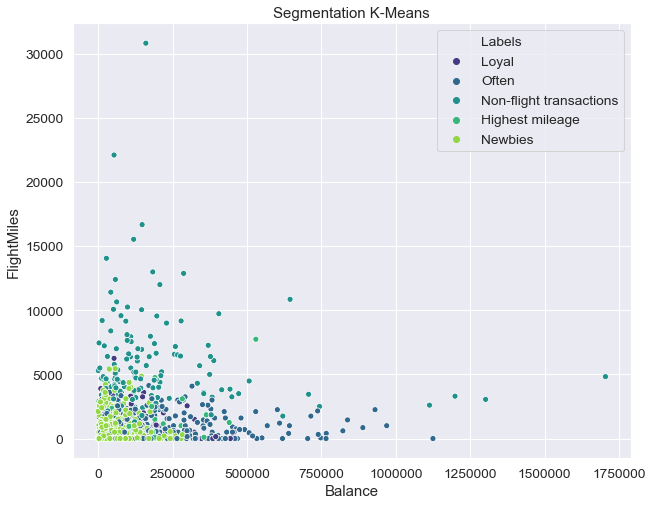

In [40]:
x_axis = df_segm_kmeans['Balance']
y_axis = df_segm_kmeans['FlightMiles']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette='viridis')
plt.title('Segmentation K-Means')
plt.show()